# Ejercicio 4
---
Aplicando el algoritmo de Aceptación y rechazo se pide:\
a) Generar 100.000 número aleatorios con distribución Normal de media 25 y desvío estándar 2.\
b) Realizar un histograma de frecuencias relativas con todos los valores obtenidos.\
c) Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la función de densidad de probabilidad brindada por el lenguaje elegido (para esta última distribución utilizar un gráfico de línea).\
d) Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from math import sqrt, exp, pi

In [4]:
cantidad = 100000
cota = sqrt(2*exp(1)/pi)
numerosEstandarSimulados = list()
numerosDistribucionReal = list()

def X(x):
    return st.norm.pdf(x, loc = 0, scale = 1)

def Y(x):
    return exp(-x)

def probabilidad(x):
    return X(x) / (Y(x) * cota)

aceptados = 0

while aceptados < cantidad:
    xi = np.random.exponential(1)
    ui = np.random.uniform()
    
    if (ui < probabilidad(xi)):
        aceptados += 1
        numerosDistribucionReal.append(np.random.normal(25, 2))
        
        if(np.random.rand() < 0.5):
            numerosEstandarSimulados.append(xi)
        else:
            numerosEstandarSimulados.append(-xi)
            
numerosSimulados = [ numero * 2 + 25 for numero in numerosEstandarSimulados ]

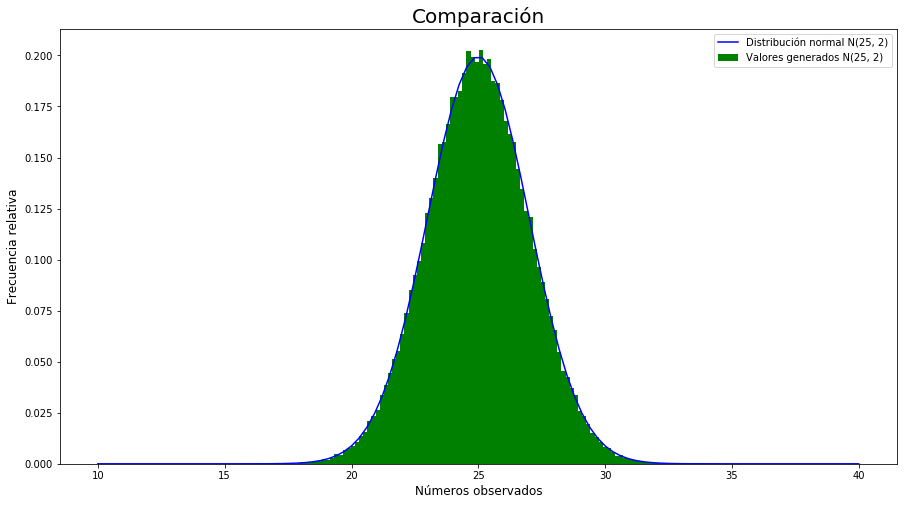

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

ax.hist(numerosSimulados,100, density=True, color="green", label='Valores generados N(25, 2)')

x = np.linspace(10, 40, 100)
ax.plot(x, st.norm.pdf(x, loc = 25, scale = 2), color="blue", label='Distribución normal N(25, 2)')

plt.xlabel('Números observados', fontsize=12)
plt.ylabel('Frecuencia relativa', fontsize=12)
plt.title("Comparación", fontsize=20)

ax.legend()

In [6]:
print('Media = ', str(np.median(numerosSimulados)))
print('Varianza', str(np.var(numerosSimulados)))

Media =  24.990155926274543
Varianza 3.9931192802486515
